___

# Exercício 1 - Berkshire Hathaway


Nome: Antonio Fuziy

In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from scipy import stats
import yahoofinancials as yf
from pprint import pprint
import mplfinance as mpf
from IPython import display

plt.style.use("dark_background")

In [12]:
#Berkshire Hathaway
ticker = 'BRK-B'

start_date = '2022-03-07'
end_date =  '2023-03-07'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')

In [13]:
brkb_raw = pd.DataFrame(data[ticker]['prices']).dropna()
brkb_raw['formatted_date'] = pd.to_datetime(brkb_raw['formatted_date'])
brkb_raw = brkb_raw.set_index('formatted_date')
brkb_raw.head()

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2022-03-07,1646663400,326.440002,320.350006,325.679993,322.720001,5875800,322.720001
2022-03-08,1646749800,327.290009,318.029999,325.299988,318.519989,7905000,318.519989
2022-03-09,1646836200,327.470001,322.579987,326.589996,325.399994,5874500,325.399994
2022-03-10,1646922600,325.700012,321.579987,322.489990,325.299988,3843600,325.299988
2022-03-11,1647009000,331.489990,326.230011,326.529999,326.600006,5135700,326.600006


In [14]:
brkb = brkb_raw.iloc[:,1:-1]
brkb.head()

,high,low,open,close,volume
formatted_date,,,,,
2022-03-07,326.440002,320.350006,325.679993,322.720001,5875800
2022-03-08,327.290009,318.029999,325.299988,318.519989,7905000
2022-03-09,327.470001,322.579987,326.589996,325.399994,5874500
2022-03-10,325.700012,321.579987,322.489990,325.299988,3843600
2022-03-11,331.489990,326.230011,326.529999,326.600006,5135700


### Lista: Exercício 1 - 14/Mar até 13h30

* Escolher alguma ação no yahoo finance (pode ser do exterior)
* Selecionar entre 6 meses a 1 ano de dados
* Usar o código da simulação acima para uma estratégia bem simples:
  * Comprar quando estiver caindo 1% em relação ao início da simulação
  * Sair da posição quando estiver ganhando ou perdendo 2% do preço de entrada
  * Entrar novamente quando o preço cair 1% do último preço de venda
* Montar um notebook próprio, não reutilizar da aula.
  * Organização: aquisição de dados, adequação e simulação
* Entregar um **PDF** com o código e o gráfico da simulação do resultado
* Prazo: 14/Mar até 13h30 via Blackboard (Após esse prazo será considerado atrasado)
* Estritamente individual

In [15]:
i = 0
wallet_list = []
mark_to_market = []
buy_signals = []
sell_signals = []
wallet = 1000
last = brkb.close[0]
position = 0
first = True
for price in brkb.close:
    sell_signal = float("nan")
    buy_signal = float("nan")
    if (price <= last*0.99) and position == 0:
        if wallet > price:
            wallet -= price
            last = price
            position = 1
            buy_signal = price
    elif (price >= last*1.02 or price <= last*0.98) and position == 1:
        wallet += price
        last = price
        position = 0
        sell_signal = price
        
    sell_signals.append(sell_signal)
    buy_signals.append(buy_signal)
    
    wallet_list.append(wallet)
    mark_to_market.append(wallet+1*position*price)

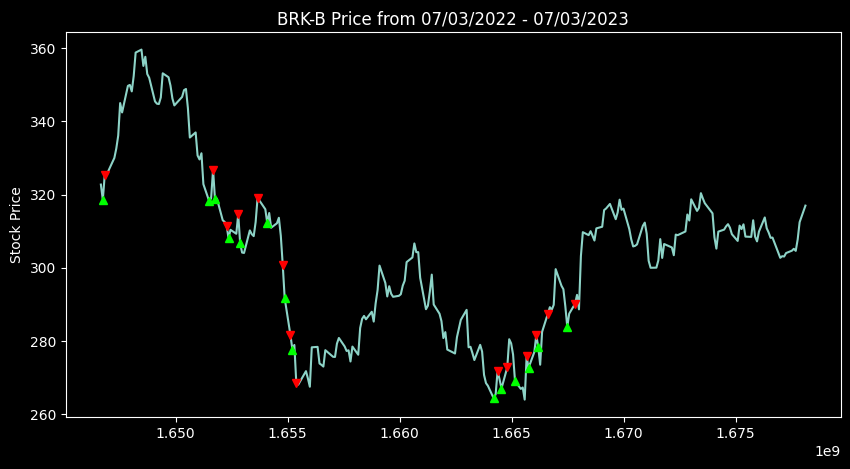

In [16]:
plt.figure(figsize=(10,5))
plt.plot(brkb_raw["date"], brkb_raw["close"])
plt.plot(brkb_raw["date"], sell_signals, marker="v", color="#ff0000")
plt.plot(brkb_raw["date"], buy_signals, marker="^", color="#00ff00")
plt.title("BRK-B Price from 07/03/2022 - 07/03/2023")
plt.ylabel("Stock Price")
plt.show()

___

### Wallet Performance

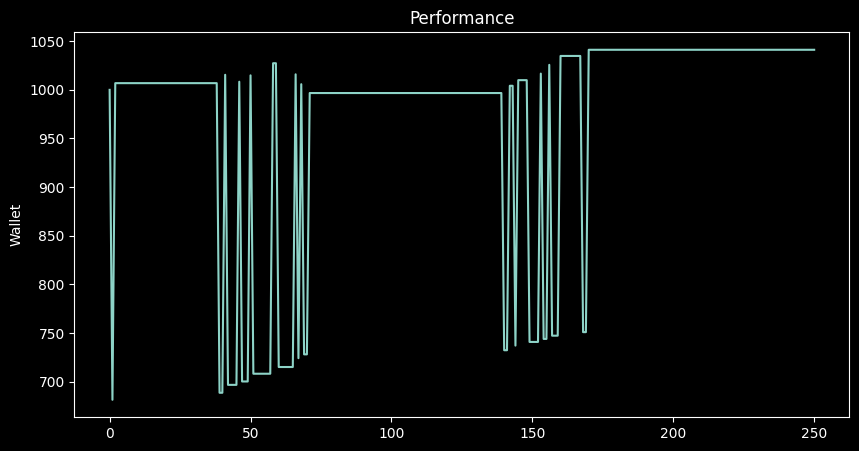

In [17]:
plt.figure(figsize=(10,5))
plt.title("Performance")
plt.ylabel("Wallet")
pd.Series(wallet_list).plot()
plt.show()

___

### Mark to Market

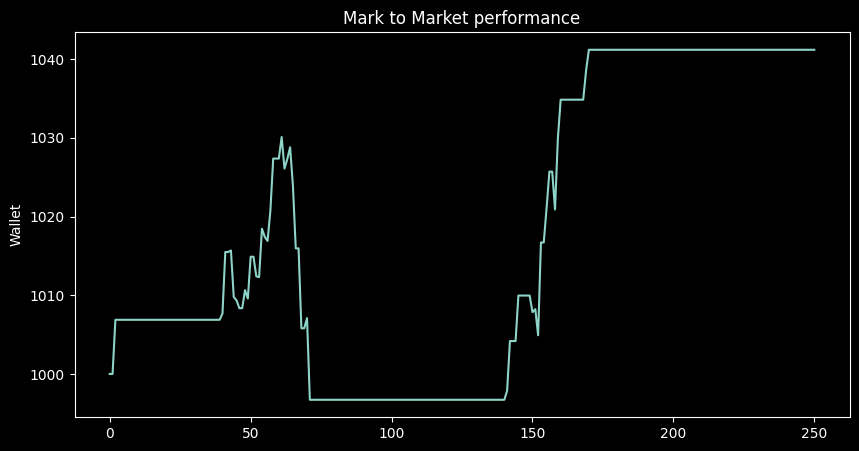

In [18]:
plt.figure(figsize=(10,5))
plt.title("Mark to Market performance")
plt.ylabel("Wallet")
pd.Series(mark_to_market).plot()
plt.show()

In [19]:
print(f"lucro: {wallet_list[-1] - wallet_list[0]}")

lucro: 41.179962158203125
